In [47]:
import os
import numpy as np

In [48]:
path_to_series = os.path.join("..", "examples", "datasets", "ecg-heartbeat-av.csv")
f = open(path_to_series)
series = np.array(f.readlines(), dtype=np.double)
series = (series - np.mean(series)) / np.std(series)
fs = 128  # sampling frequency

In [49]:
# uncomment this code block for the multivariate ECG example:
path_to_series = os.path.join("..", "examples", "datasets", "mitdb_patient214.csv")
f = open(path_to_series)
series = np.array([line.split(',') for line in f.readlines()], dtype=np.double)
series = (series - np.mean(series, axis=None)) / np.std(series, axis=None)

fs = 360  # sampling frequency

In [50]:
print(series.shape)

(3600, 2)


In [51]:
# z-normalize time series
# series = (series - np.mean(series, axis=0)) / np.std(series, axis=0)

# Parameter rho determines the 'strictness' of the algorithm  
#   - higher -> more strict (more similarity in discovered motif sets)
#   - lower  -> less strict (less similarity in discovered motif sets) 
rho = 0.6

# Number of motifs to be found
nb_motifs = 2

# Heartbeats last 0.6s - 1s (equivalent to 60-100 bpm)
l_min = int(0.6 * fs)
l_max = int(  1 * fs)

# This parameter determines how much the motifs may overlap (intra and inter motif set)
overlap = 0

In [52]:
import locomotif.locomotif as locomotif
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho=rho, nb=nb_motifs, overlap=overlap)
print(motif_sets)

[((2666, 2932), [(2666, 2932), (1892, 2137), (1038, 1333), (3168, 3490), (2334, 2666), (628, 1036), (1589, 1893), (1, 261)]), ((1333, 1565), [(1333, 1565), (2137, 2333), (2932, 3162)])]


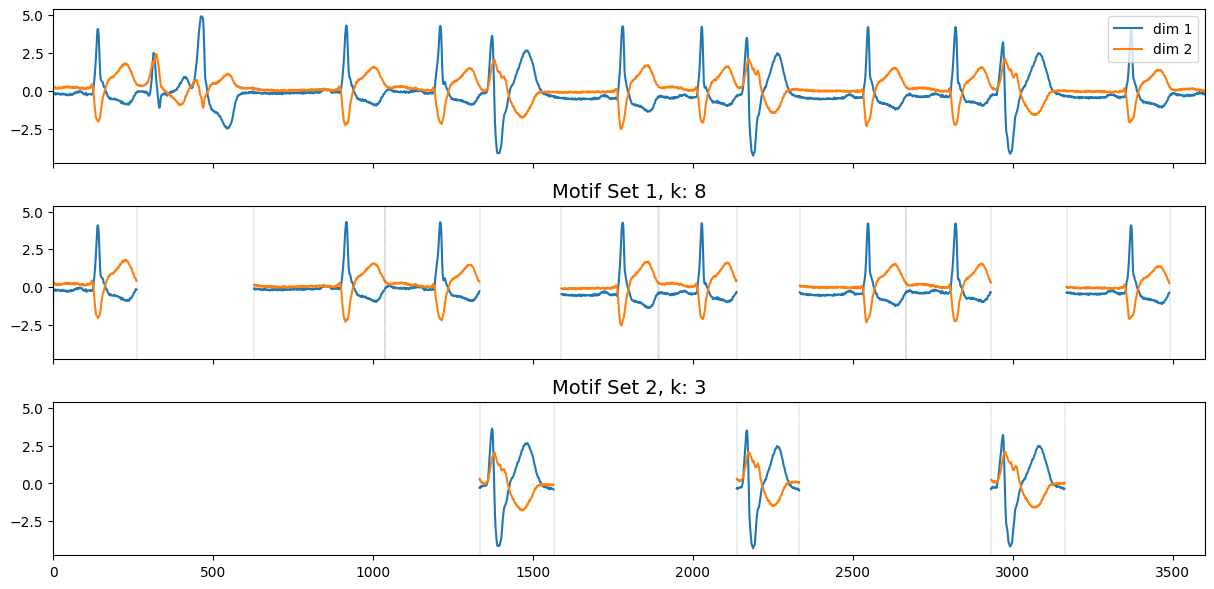

In [53]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Without Time Warping

In [54]:
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho, nb_motifs, overlap=overlap, warping=False)
print(motif_sets)

[((3230, 3500), [(3230, 3500), (2408, 2678), (777, 1047), (2681, 2951), (0, 270), (1888, 2158), (1070, 1340)]), ((1354, 1632), [(1354, 1632), (2951, 3229)])]


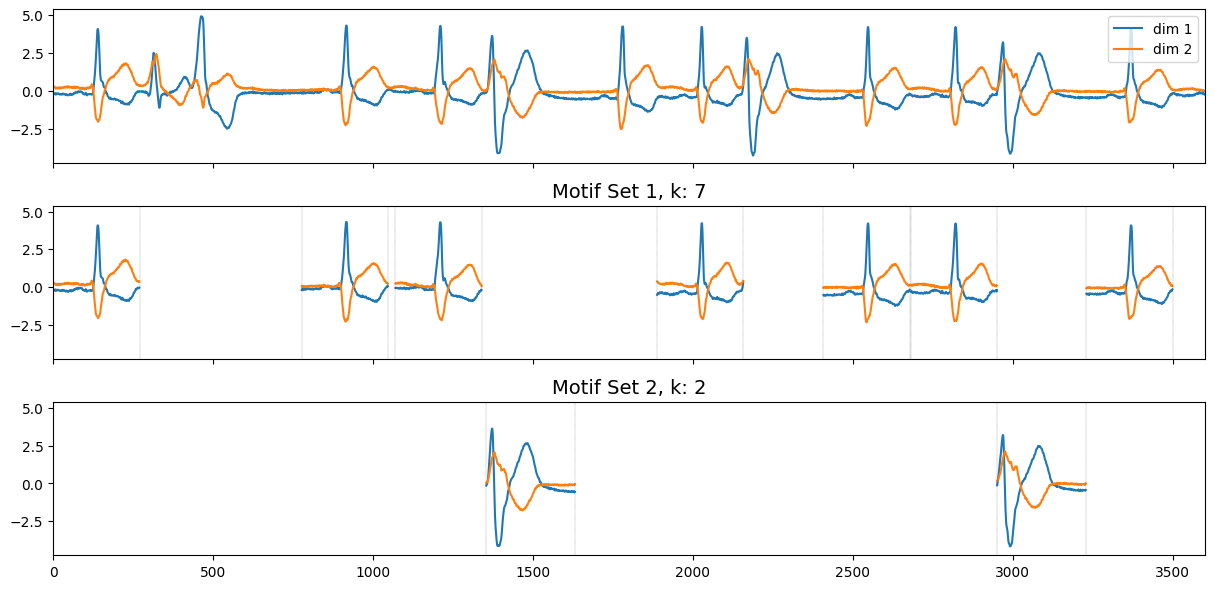

In [55]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Start and End Constraints

In [56]:
# start_mask specifies whether a motif can start at a certain time index (same for end_mask)

# for example: a candidate segment can only start in the second half of the time series:
n = len(series)
start_mask = np.full(n, True)
start_mask[:n//2] = False

In [57]:
motif_sets = locomotif.apply_locomotif(series, l_min, l_max, rho, nb_motifs, overlap=overlap, start_mask=start_mask, end_mask=None)
print(motif_sets)

[((2666, 2932), [(2666, 2932), (1892, 2137), (1038, 1333), (3168, 3490), (2334, 2666), (628, 1036), (1589, 1893), (1, 261)]), ((2932, 3155), [(2932, 3155), (2137, 2333), (1333, 1558)])]


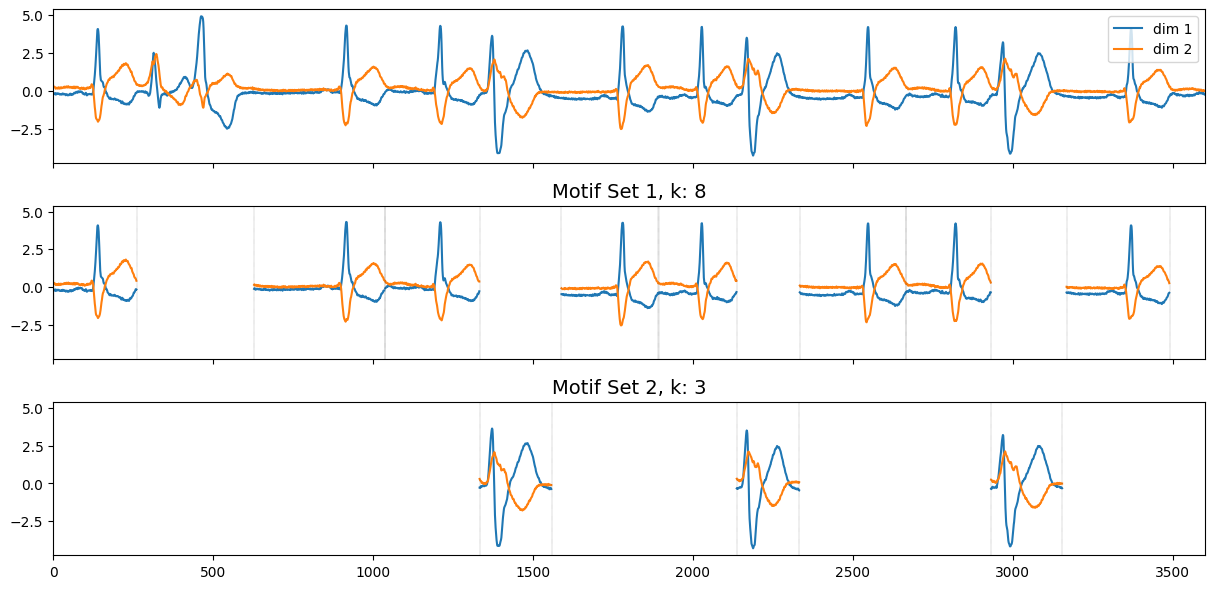

In [58]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()